             Name  Landmass  Zone  Area  Population  Language  Religion  Bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   Stripes  Colors  ...  Saltires  Quarters  Sunstars  Crescent  Triangle  \
0        3       5  ...         0         0         1         0         0   
1        0       3  ...         0         0         1         0         0   
2        0       3  ...         0         0         1         1         0   
3        0       5  ...         0         0         0         0         1   
4        0       3  ...         0         0         0         0         0   

   Icon  Animate Text  Topleft  Botright  
0     1

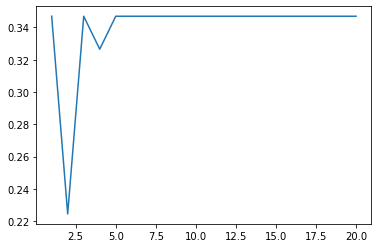

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
 
"""

Lets start by seeing what the data looks like. Begin by loading the data into a variable named flags using Pandas pd.read_csv() function. The function should take the name of the CSV file you want to load. In this case, our file is named "flags.csv".

We also want row 0 to be used as the header, so include the parameter header = 0.

 """

flags = pd.read_csv("/Users/hiro0x/Documents/alphaprime/ai-ml-data/classification/flags.csv", header=0)

""" Take a look at the names of the columns in our DataFrame. These are the features we have available to us. Print flags.columns.

Lets also take a look at the first few rows of the dataset. Print flags.head().
"""

print(flags.head())
print(flags.columns)

"""
Were eventually going to use create a decision tree to classify what Landmass a country is on.

Create a variable named labels and set it equal to only the "Landmass" column from flags.
"""

labels = flags[["Landmass"]]

print(labels)

"""
We have our labels. Now we want to choose which columns will help our decision tree correctly classify those labels.

You could spend a lot of time playing with groups of columns to find the that work best. But for now, lets see if we can predict where a country is based only on the colors of its flag.

Create a variable named data and set it equal to a DataFrame containing the following columns from flags:

"Red"
"Green"
"Blue"
"Gold"
"White"
"Black"
"Orange"

"""

data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange"]]

"""
Finally, lets split these DataFrames into a training set and test set using the train_test_split() function. This function should take data and labels as parameters. Also include the parameter random_state = 1.

This function returns four values. Name those values train_data, test_data, train_labels, and test_labels in that order.
"""

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

"""

Create a DecisionTreeClassifier and name it tree. When you create the tree, give it the parameter random_state = 1.
"""

tree = DecisionTreeClassifier(random_state=1)

"""

Call tree‘s .fit() method using train_data and train_labels to fit the tree to the training data.
"""

tree.fit(train_data, train_labels)


"""

Call .score() using test_data and test_labels. Print the result.

Since there are six possible landmasses, if we randomly guessed, wed expect to be right about 16% of the time. Did our decision tree beat randomly guessing?

"""

print(tree.score(test_data, test_labels))

"""
We now have a good baseline of how our model performs with these features. Lets see if we can prune the tree to make it better!

Put your code that creates, trains, and tests the tree inside a for loop that has a variable named `i` that increases from 1 to 20.

Inside your for loop, when you create tree, give it the parameter `max_depth = i`.

Well now see a printout of how the accuracy changes depending on how large we allow the tree to be.
"""
scores = []

for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))

print(scores)

"""We now have a good baseline of how our model performs with these features. Lets see if we can prune the tree to make it better!

Put your code that creates, trains, and tests the tree inside a for loop that has a variable named i that increases from 1 to 20.

Inside your for loop, when you create tree, give it the parameter max_depth = i.

Well now see a printout of how the accuracy changes depending on how large we allow the tree to be."""



"""Lets now plot our points. Call plt.plot() using two parameters. The first should be the points on the x-axis. In this case, that is range(1, 21). The second should be scores.

Then call plt.show()."""

plt.plot(range(1, 21), scores)
plt.show()  

"""
Our graph doesnt really look like we would expect it to. It seems like the depth of the tree isnt really having an impact on its performance. This might be a good indication that were not using enough features.

Lets add all the features that have to do with shapes to our data. data should now be set equal to:

flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]
What does your graph look like after making this change?"""


0.3469387755102041
[0.3469387755102041, 0.22448979591836735, 0.3469387755102041, 0.32653061224489793, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041]


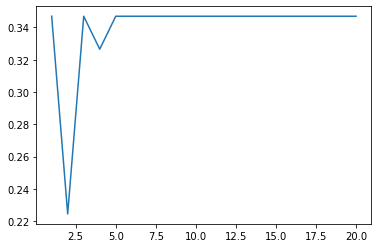

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

flags = pd.read_csv("/Users/hiro0x/Documents/alphaprime/ai-ml-data/classification/flags.csv", header=0)

labels = flags[["Landmass"]]

data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles", "Crosses", "Saltires", "Quarters", "Sunstars", "Crescent", "Triangle"]]

tree = DecisionTreeClassifier(random_state=1)
tree.fit(train_data, train_labels)
print(tree.score(test_data, test_labels))

scores = []

for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))

print(scores)


plt.plot(range(1, 21), scores)
plt.show()  